<a href="https://colab.research.google.com/github/chesere/chess/blob/master/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# **Data preprocessing**

Load data

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Normalization

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Reshape data to fit model input requirements

In [ ]:
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

Convert labels to hot vectors

In [ ]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# **Model Deployment**

Design a CNN

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Model Training**

Train model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4433 - accuracy: 0.8389 - val_loss: 0.3970 - val_accuracy: 0.8535
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2988 - accuracy: 0.8902 - val_loss: 0.3119 - val_accuracy: 0.8869
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2536 - accuracy: 0.9058 - val_loss: 0.2783 - val_accuracy: 0.8975
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2205 - accuracy: 0.9175 - val_loss: 0.2715 - val_accuracy: 0.9003
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1960 - accuracy: 0.9263 - val_loss: 0.2630 - val_accuracy: 0.9063
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1707 - accuracy: 0.9358 - val_loss: 0.2561 - val_accuracy: 0.9107
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1485 - accuracy: 0.9440 - val_loss: 0.2705 -

# **Evaluation and Analysis**

Evaluate model on the test dataset

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 5ms/step - loss: 0.2961 - accuracy: 0.9146
Test accuracy: 0.9146000146865845


plot training and validation accuracy and loss over epochs

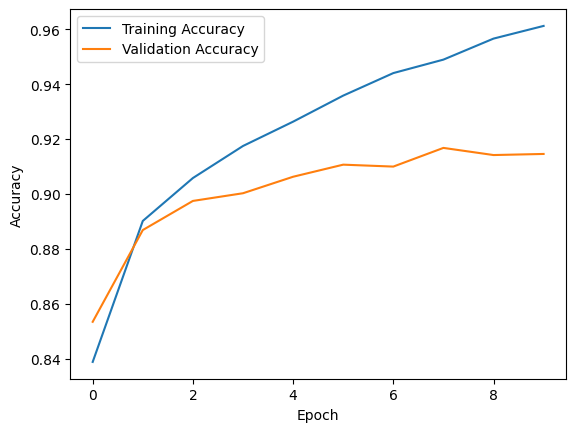

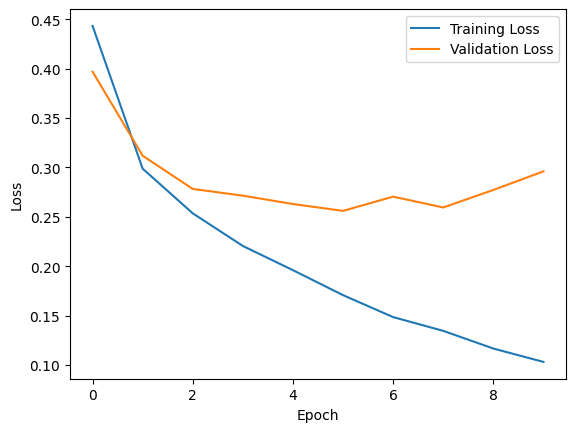

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Display sample images with their predicted and actual labels

313/313 [==============================] - 2s 6ms/step


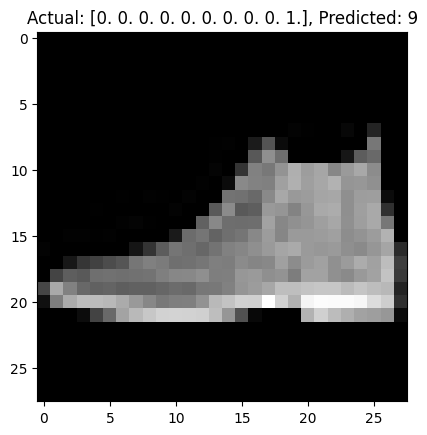

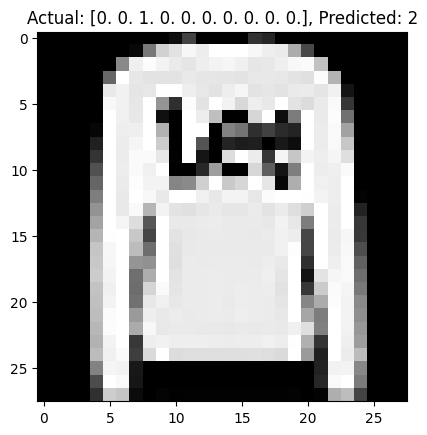

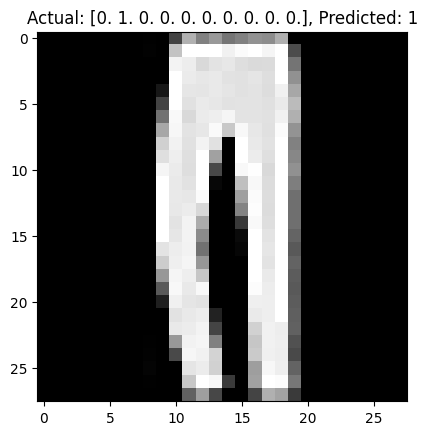

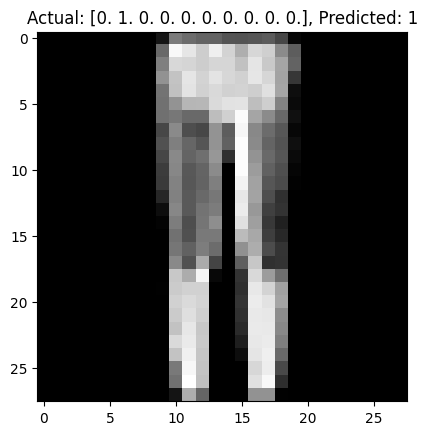

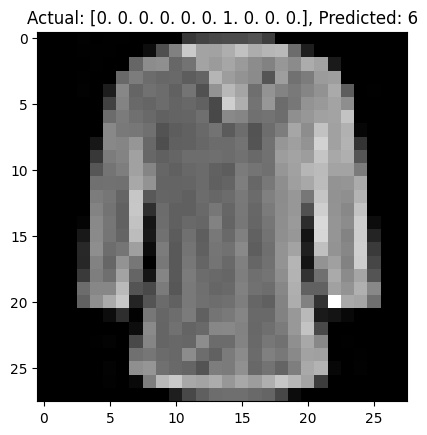

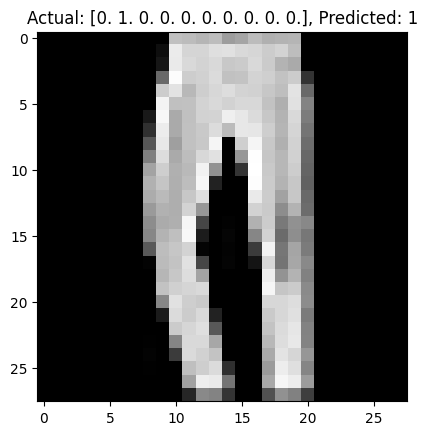

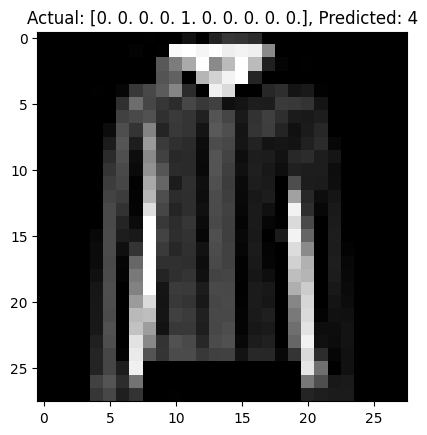

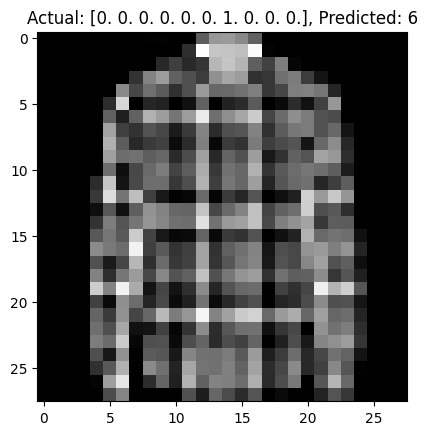

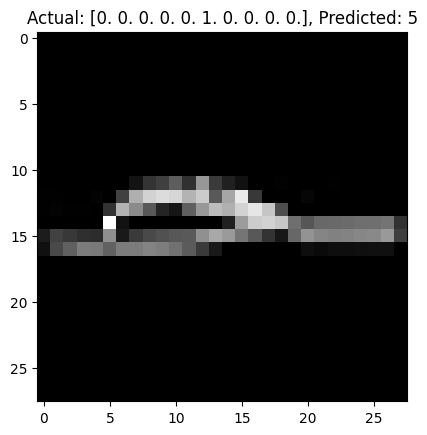

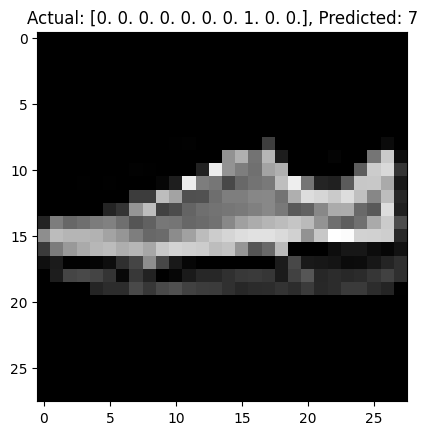

In [ ]:
predictions = model.predict(test_images)
sample_images = test_images[:10]
sample_labels = test_labels[:10]
predicted_labels = tf.argmax(predictions, axis=1).numpy()

for i in range(10):
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Actual: {sample_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.show()